# Perceptron

This note introduces the **Perceptron** algorithm using scikit-learn, explains the step-by-step logic behind how it works, and then demonstrates a from-scratch implementation to show that the core idea is simple and easy to build.

## What is the Perceptron?

The Perceptron is one of the earliest algorithms for **binary classification** — it tries to find a straight line (or hyperplane) that separates two classes of data points.

It’s like drawing a boundary between red dots and blue dots, learning which side of the line each class belongs to.

The Perceptron doesn’t estimate probabilities or output a continuous value — instead, it makes a **hard decision**:  
either **Class 0** or **Class 1**, based on the sign of a linear function.

This notebook will:

- Use scikit-learn to demonstrate how the Perceptron works in practice  
- Explain the logic behind it in an intuitive way  
- Show how to implement the same idea step by step from scratch  

Let’s dive into the details to understand how it works and how to implement it ourselves.

## Preparation

We’ll start by importing the necessary libraries and generating a simple synthetic dataset suitable for binary classification.

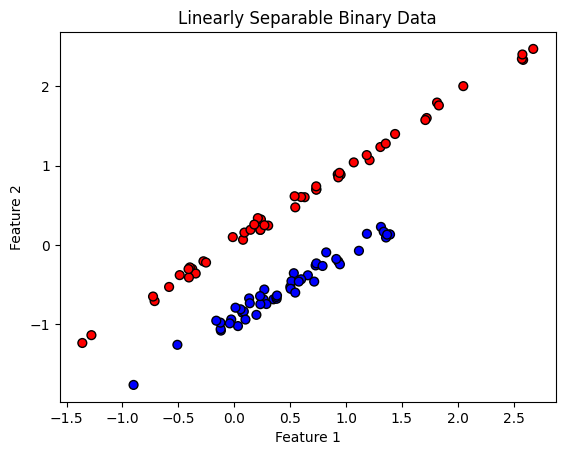

In [ ]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.5,
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=40)
plt.title("Linearly Separable Binary Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Here we can see the data. Let's use scikit-learn to classify it.

## Implement with Scikit-Learn

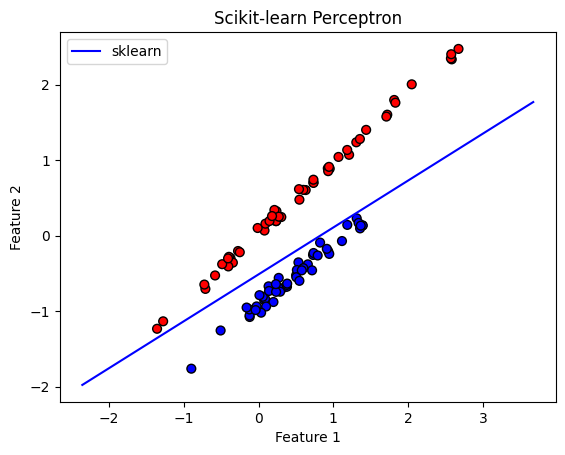

In [ ]:
from sklearn.linear_model import Perceptron

# Train the model
clf = Perceptron(max_iter=1000, eta0=1.0, shuffle=False, random_state=42)
clf.fit(X, y)

# Extract weight and bias
w_sklearn = clf.coef_[0]
b_sklearn = clf.intercept_[0]

# Plot decision boundary
def plot_decision_boundary(X, y, w, b, title="", label="", color="black"):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=40)
    
    # Create line: w0*x + w1*y + b = 0 → y = -(w0*x + b) / w1
    x_vals = np.array([X[:, 0].min() - 1, X[:, 0].max() + 1])
    y_vals = -(w[0] * x_vals + b) / w[1]
    
    plt.plot(x_vals, y_vals, label=label, color=color)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

plot_decision_boundary(X, y, w_sklearn, b_sklearn, title="Scikit-learn Perceptron", label="sklearn", color="blue")

## Understanding the Visualization

Each colored region shows how the Perceptron has learned to separate the data into two classes using a straight line.

When it sees a point, it calculates a **weighted sum** of the input features.  
If the result is positive, it predicts **Class 1**; otherwise, **Class 0**.

Dots are the data points, and the **line** is the learned decision boundary.

## Behind the Scenes

### 1. Initialize Weights and Bias
- Start with small random weights (or just zeros).
- The Perceptron will learn how to adjust them over time.

### 2. Repeat the Following Steps for Each Epoch

> An **epoch** means one full pass through all training data.

For each data point:
1. **Make a prediction**:
$$
\hat{y} = 
\begin{cases}
 1 & \text{if } w \cdot x + b \geq 0 \\
 0 & \text{otherwise}
\end{cases}
$$

2. **Compare** the prediction $\hat{y}$ to the true label $y$.

3. **If it's correct** → do nothing.  
   **If it's wrong** → update the weights and bias:

$$
w := w + \eta (y - \hat{y})x
$$

$$
b := b + \eta (y - \hat{y})
$$

> In each epoch, the model **checks every single data point**, and adjusts the weights **only if there’s a mistake**. This is why the Perceptron is called a **mistake-driven algorithm**.

### 3. Repeat Until It Gets Everything Right

- Once there are **no more mistakes in an entire epoch**, training stops.
- The model has **converged** and learned a decision boundary that separates the classes.

## Decision Rule

The decision boundary is a line (or hyperplane) defined by:

$$
w \cdot x + b = 0
$$

Points on one side of the line are classified as **Class 0**, and the other side as **Class 1**.

> All of this is handled behind the scenes when you use `sklearn.linear_model.Perceptron`.

## Let’s Code It

Let’s build the Perceptron from scratch, train it, and visualize the decision boundary just like we did with the custom Linear Regression model.

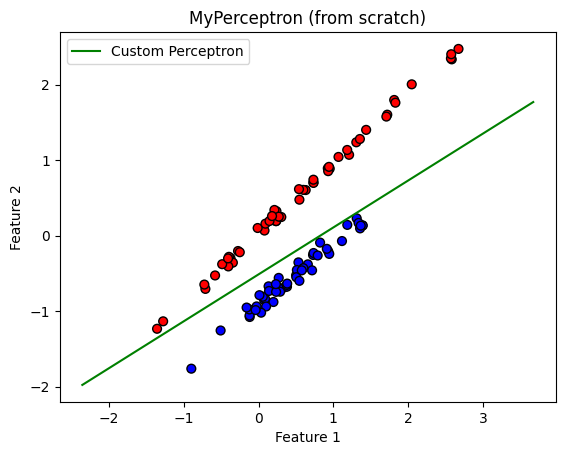

In [ ]:
class MyPerceptron:
    def __init__(self, learning_rate=1.0, max_iter=1000):
        # η (eta): the learning rate — controls how much weights are adjusted per mistake
        self.eta = learning_rate

        # Maximum number of passes (epochs) over the training data
        self.max_iter = max_iter

        # Weights (w) and bias (b) will be initialized during training
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Step 1: Initialize weights and bias to zero
        self.w = np.zeros(n_features)
        self.b = 0

        # Step 2: Repeat for each epoch
        for _ in range(self.max_iter):
            errors = 0  # Count how many mistakes happen in this epoch

            # (Optional improvement: shuffle data here for consistency with sklearn)
            for xi, target in zip(X, y):
                # Step 2a: Compute prediction using weighted sum + bias
                # This is z = w·x + b
                z = np.dot(self.w, xi) + self.b

                # Step 2b: Apply sign function
                # Predict 1 if z ≥ 0, else predict 0
                y_pred = 1 if z >= 0 else 0

                # Step 2c: If prediction is wrong, update weights and bias
                # Update rule:
                # w := w + η(y - ŷ)x
                # b := b + η(y - ŷ)
                update = self.eta * (target - y_pred)
                if update != 0:
                    self.w += update * xi
                    self.b += update
                    errors += 1  # Count mistake

            # Step 3: If there were no errors, we’ve converged — stop early
            if errors == 0:
                break

    def predict(self, X):
        # Prediction for multiple samples: sign(w·x + b)
        return np.where(np.dot(X, self.w) + self.b >= 0, 1, 0)

# Train custom Perceptron
my_perceptron = MyPerceptron(learning_rate=1.0, max_iter=1000)
my_perceptron.fit(X, y)

# Plot boundary
plot_decision_boundary(X, y,
                       my_perceptron.w,
                       my_perceptron.b,
                       title="MyPerceptron (from scratch)",
                       label="Custom Perceptron",
                       color="green")

## It Works!!

The classification result produced by our scratch **Perceptron** implementation closely matches the result from `scikit-learn`.  
This confirms that the logic we implemented — prediction with a weighted sum, mistake-driven updates, and early stopping upon convergence — behaves as expected.

We've successfully built the **Perceptron algorithm** from the ground up!